In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')



In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:


print("Data Types:")
print(df.dtypes)

Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:
df.dropna(inplace=True)

print("\nMissing Values after dropping rows with missing values:")
print(df.isnull().sum())

print("\nShape of dataframe after dropping rows with missing values:")
print(df.shape)



Missing Values after dropping rows with missing values:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Shape of dataframe after dropping rows with missing values:
(8636, 18)


In [6]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())



Duplicate Rows:
0


In [7]:
print("\nStatistical Description:")
print(df.describe())

print("\nData Types:")
print(df.dtypes)



Statistical Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      

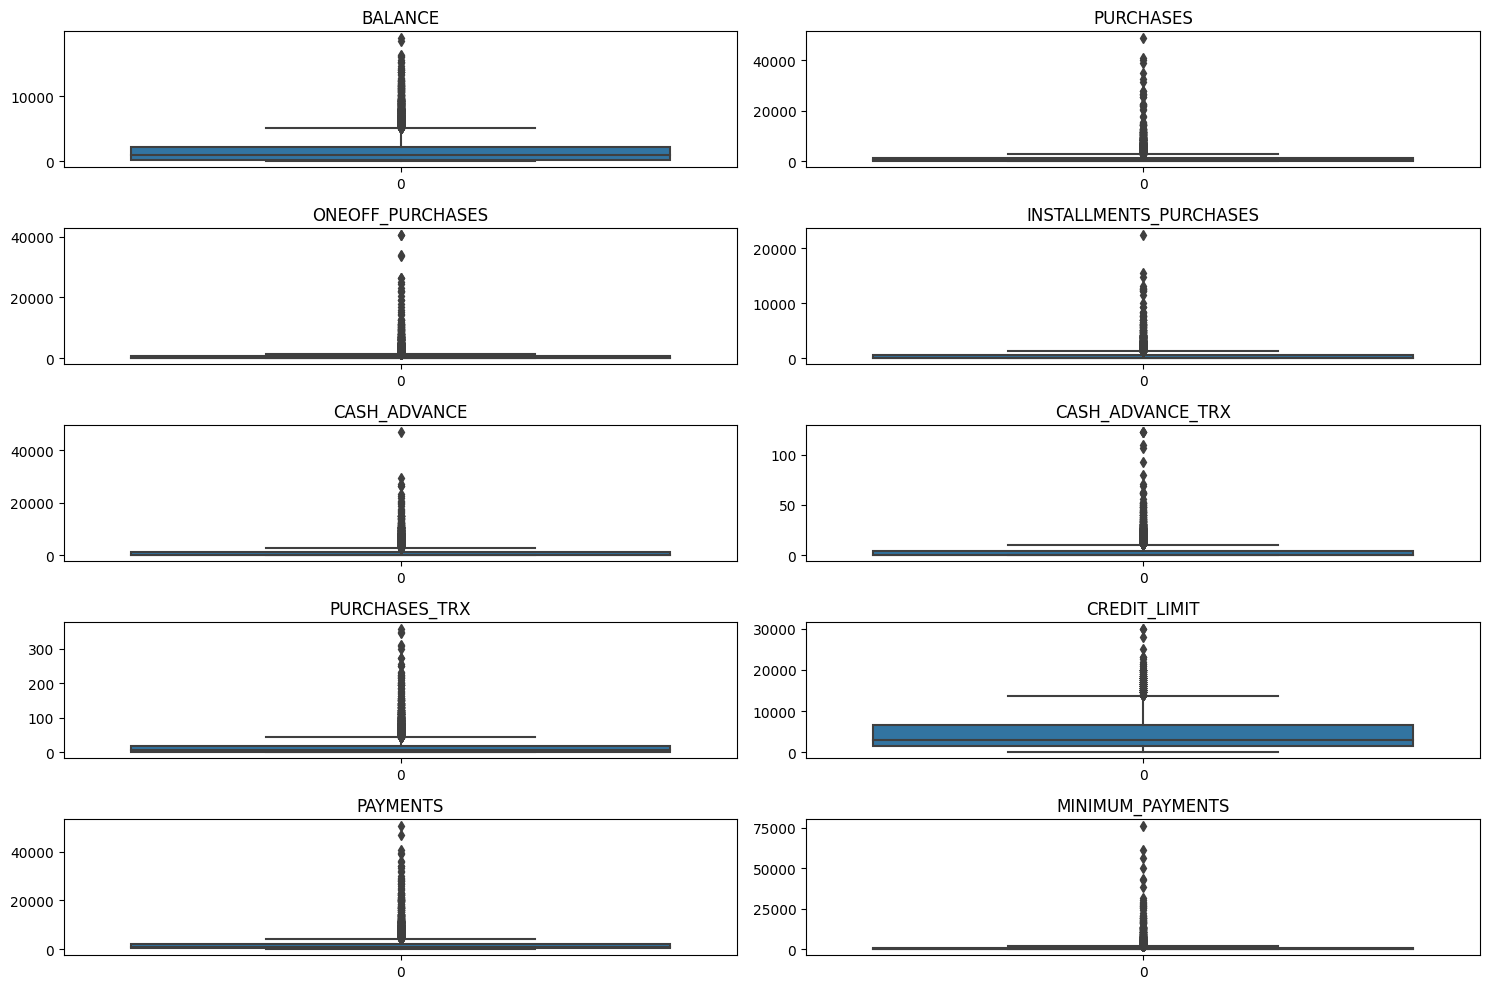

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("\nData after Z-Score Normalization:")
print(df.head())



Data after Z-Score Normalization:
  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001 -0.744625           0.818182  -0.429184         -0.359160   
1  C10002  0.764152           0.909091  -0.473208         -0.359160   
2  C10003  0.426602           1.000000  -0.116413          0.099909   
4  C10005 -0.373910           1.000000  -0.465825         -0.349660   
5  C10006  0.099551           1.000000   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655             0.166667   
1               -0.458839      2.568556             0.000000   
2               -0.458839     -0.468655             1.000000   
4               -0.458839     -0.468655             0.083333   
5                0.994815     -0.468655             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                  

In [10]:
print("\nShape of dataframe before applying PCA:")
print(df.shape)


Shape of dataframe before applying PCA:
(8636, 18)


In [11]:
from sklearn.decomposition import PCA

X = df.drop('CUST_ID', axis=1)

pca = PCA(n_components=0.95)  # الحفاظ على 95% من التباين
X_pca = pca.fit_transform(X)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# عرض الأبعاد الجديدة
print(f"Shape of reduced features: {X_pca.shape}")


Explained variance ratio: [0.3129752  0.19671729 0.13826635 0.08608403 0.064322   0.06012944
 0.04148926 0.02920957 0.02798883]
Shape of reduced features: (8636, 9)


In [12]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X_pca)

labels = kmeans.predict(X_pca)

score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score}")

print("Cluster Centers:")
print(kmeans.cluster_centers_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.47790894851282606
Cluster Centers:
[[-5.55663431e-01 -2.01867002e-01 -2.14282128e-03 -2.82320147e-02
   7.38747068e-03  4.51773086e-02  2.16992819e-02  1.94389378e-02
   1.04361318e-02]
 [ 3.22880770e+00  1.17299374e+00  1.24513464e-02  1.64048489e-01
  -4.29265646e-02 -2.62512941e-01 -1.26088572e-01 -1.12954332e-01
  -6.06414979e-02]]


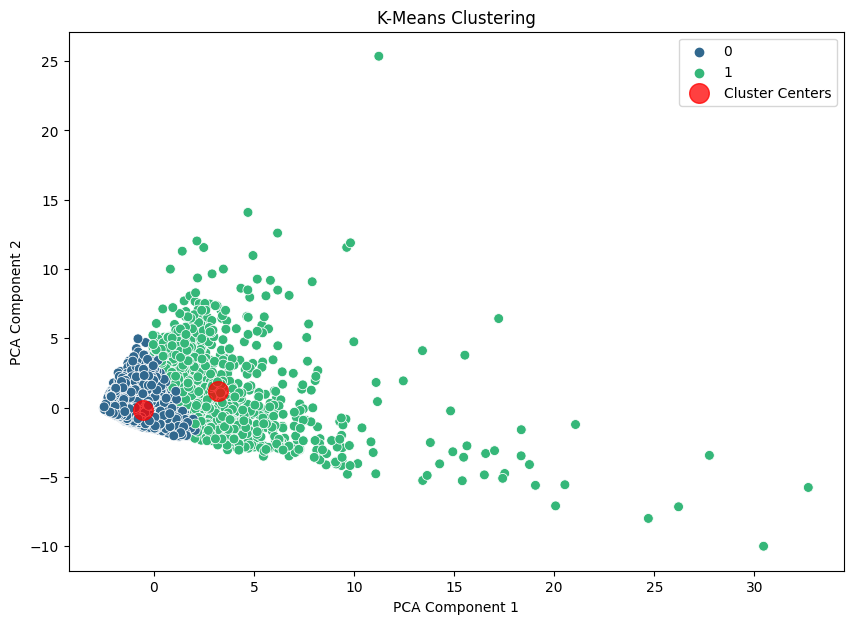

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Silhouette Score: 0.44304223614832666


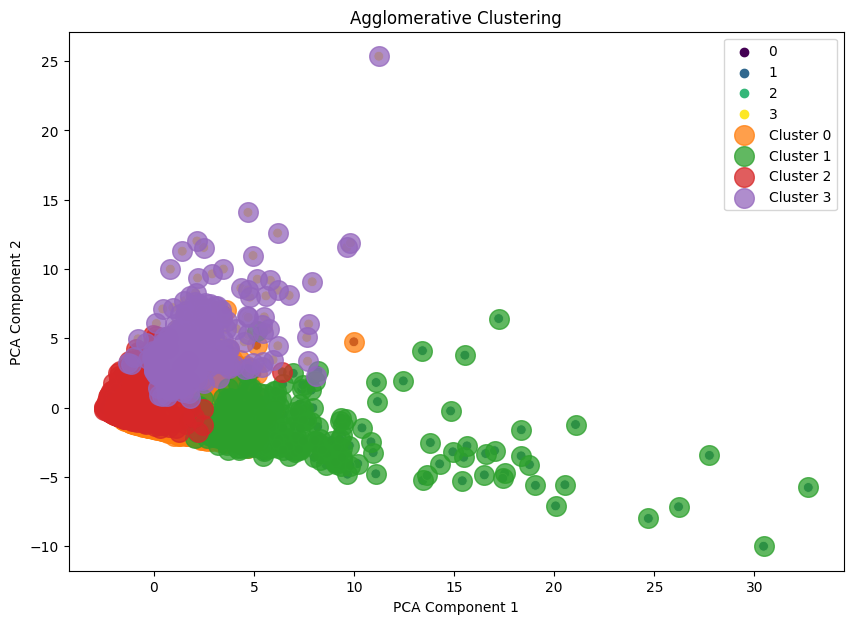

In [14]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=4)

agg_clustering.fit(X_pca)

labels = agg_clustering.labels_

score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)

unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  
        class_member_mask = (labels == label)
        xy = X_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=200, alpha=0.75, label=f'Cluster {label}')

plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Silhouette Score: 0.652720763749046


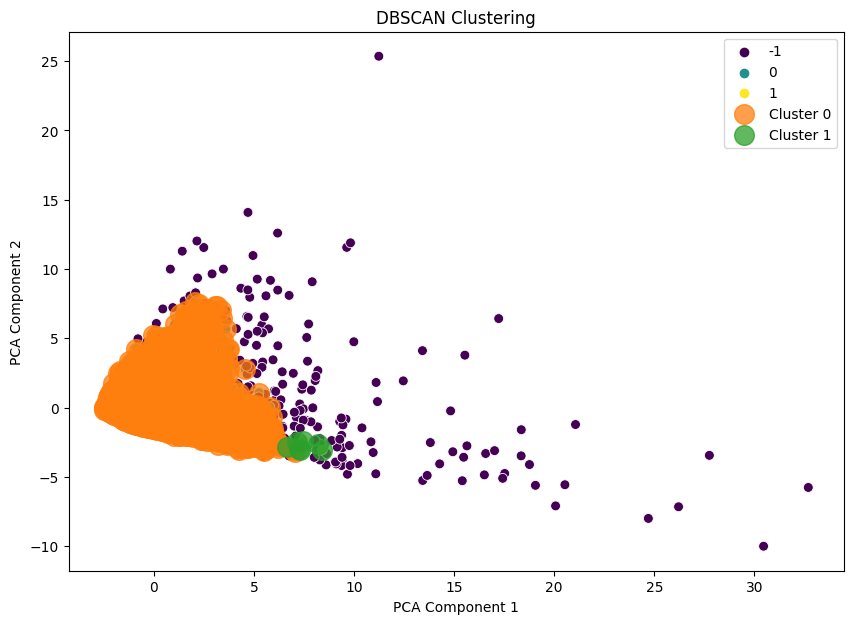

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=2, min_samples=5)

dbscan.fit(X_pca)

labels = dbscan.labels_


silhouette_samples = X_pca[labels != -1]
silhouette_labels = labels[labels != -1]
score = silhouette_score(silhouette_samples, silhouette_labels)
print(f"Silhouette Score: {score}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)

unique_labels = set(labels)
for label in unique_labels:
    if label != -1:  
        class_member_mask = (labels == label)
        xy = X_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=200, alpha=0.75, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


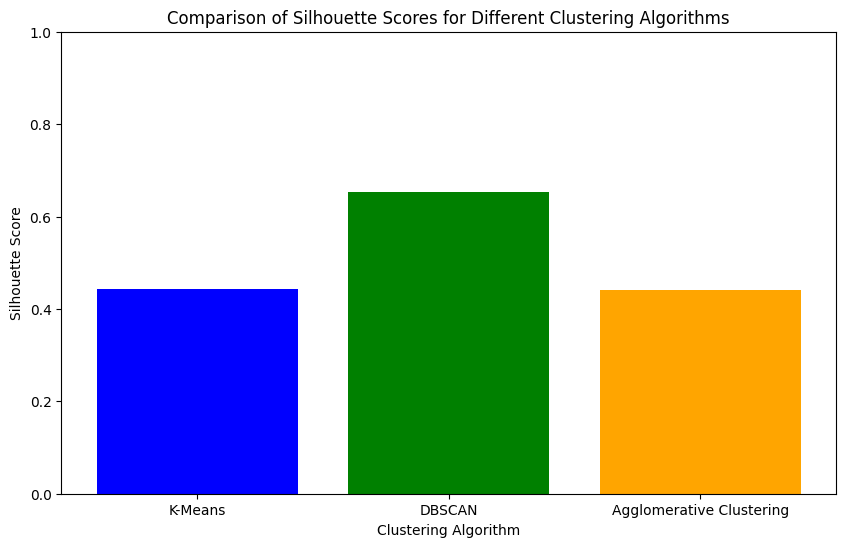

In [16]:
kmeans_silhouette = 0.443  
dbscan_silhouette = 0.652  
agglo_silhouette = 0.441 

silhouette_scores = [kmeans_silhouette, dbscan_silhouette, agglo_silhouette]
algorithms = ['K-Means', 'DBSCAN', 'Agglomerative Clustering']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, silhouette_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores for Different Clustering Algorithms')
plt.ylim(0, 1) 
plt.show()

In [17]:
numeric_df = df.select_dtypes(include=[float, int])

numeric_df['Cluster'] = labels

cluster_summary = numeric_df.groupby('Cluster').mean()

print(cluster_summary)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
-1       1.743770           0.956084   2.680871          2.164217   
 0      -0.057452           0.892938  -0.092286         -0.076301   
 1       0.059425           1.000000   4.816382          6.037560   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
-1                     2.359565      1.602530             0.739153   
 0                    -0.077918     -0.052409             0.487574   
 1                     0.292395     -0.409691             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
-1                         0.456004                          0.627812   
 0                         0.197011                          0.360145   
 1         